#  Pre-Modeling : Feature Exploration and Data Preprocessing in Python


### Table of Contents

* 1. **Introduction**
* 2. **Descriptive Analysis**
* 3. **Exploratory Data Analysis (EDA)**
    * Univariate Plots
    * Multivariate Plots
* 4. **Feature Engineering**
    * Plotting New Features
    * Transform the rest of categorical features to encode the datasets into a numerical one.


## 1. Introduction
In this project we walk through the process of examining and understanding the characteristics or attributes (features) of a dataset. The datasets used in this project is "KaggleV2-May-2016.csv", which contains informations about medical appointments in Brazil. The main question we are trying to answer here is what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


#### IMPORTING RELEVANT LIBRARIES

In [1]:
# MAKE KAGGLE API IS INSTALLED. WE'LL DOWNLOAD DATASETS FROM KAGGLE ACCOUNT.
#! pip install kaggle

# IMPORTING DEPENDENCIES

# Ignore warning messages
import warnings

warnings.filterwarnings('ignore')

# Magic command to enable interactive plots in
# the notebook interface

%matplotlib inline


# Importing libraries for data analysis
import numpy as np, pandas as pd, webbrowser, os, pickle, zipfile


# Set up parameters in pandas
pd.set_option('display.notebook_repr_html', True, 'display.max_rows', 1000, 'display.max_columns', 100,
              'display.float_format', lambda x:"{:.2f}".format(x))

# Seaborn and Matplotlib for plotting
import matplotlib.pyplot as plt, seaborn as sns

# Import feature_extraction from scikit learn
from sklearn import feature_extraction

# Set up parameters in Matplotlib
params = {'axes.titlesize':10.2, 'axes.spines.top':False, 'axes.spines.right':False,
          'xtick.labelsize':8.2, 'ytick.labelsize':8.2, 'figure.figsize':[9.8, 8], 'font.size':8}

plt.rcParams.update(params)

In [2]:
# Set Up Kaggle API Credentials. This will download a file called kaggle.json.
# Ensure that the kaggle.json file is correctly placed in the .kaggle directory 
# and that it has the correct permissions (chmod 600 ~/.kaggle/kaggle.json)

! mkdir -p ~/.kaggle && cp ./kaggle.json ~/.kaggle && chmod 600 ~/.kaggle/kaggle.json

cp: ./kaggle.json: No such file or directory


In [3]:
# Download datasets as a .zip file into current directory. You can use -p flag to 
# specify a directory where you want datasets to downloaded
! kaggle datasets download -d 'joniarroba/noshowappointments'

Dataset URL: https://www.kaggle.com/datasets/joniarroba/noshowappointments
License(s): CC-BY-NC-SA-4.0
100%|██████████████████████████████████████| 2.40M/2.40M [00:00<00:00, 3.30MB/s]
100%|██████████████████████████████████████| 2.40M/2.40M [00:00<00:00, 3.28MB/s]


In [4]:
# Unzip the file to access to datasets
with zipfile.ZipFile('noshowappointments.zip', 'r')  as z:
  z.extractall()

# You can remove zip file afterwards
! rm -rf noshowappointments.zip && ls

KaggleV2-May-2016.csv               data.html
PredictingMedicalAppointment1.ipynb requirement.txt
README.md


#### A. Loading Datasets In Pandas' DataFrame

In [5]:
# Load the dataset into memory using Pandas' DataFrame
data = pd.read_csv('KaggleV2-May-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])

# Display the first 5 rows of the datasets for sanitation check
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.00,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.00,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.00,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.00,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.00,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### B. Displaying datasets in HTML format:

This enables us to visualize the data more effectively than in a Jupyter Notebook

In [6]:
def html_data(data=data[:500]):
    # Define a temporary html file
    html = data.to_html()

    # Save the file
    with open('data.html', 'w') as f:
        f.write(html)

    # Define the full path for file
    file_name = os.path.abspath('data.html')

    # Open webbrowser
    webbrowser.open('file://{}'.format(file_name))
# Display data using html
html_data()

## 2. Descriptive Analysis:

Descriptive analysis involves describing and summarizing the main features of a dataset. It includes measures such as mean, median, mode, standard deviation, and other summary statistics to provide a clear understanding of the data's characteristics. To do that, we'll use some methods such as info and decribe functions provided by pandas library.




### 2.1 Info :
The "info()" returns a summary of the dataset's characteristics, including its shape, which consists of the number of rows and columns. Additionally, it provides information about the column names, their respective data types, and any missing values within the dataset

In [7]:
# Define the info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

The dataset comprises 110,527 rows and 14 columns. After conducting a comprehensive examination of the dataset to identify any missing values, we are pleased to report that there were no missing values present in any of the variables. Consequently, there was no need to perform imputation or removal of missing values during the preprocessing stage. The columns appear to have their appropriate data types, with the exception of the datetime variables, which were processed upon loading the dataset

### 2.2 Satistical summary :

The "describe()" is a useful function for generating descriptive statistics of a DataFrame or Series to helping us quickly understand its distribution and key properties.

In [8]:
# Here we use T (transpose) to switch rows and columns
# For numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.00,147496265710394.06,256094920291738.88,39217.84,4172614444192.00,31731838713978.00,94391720898175.00,999981631772427.00
AppointmentID,110527.00,5675305.12,71295.75,5030230.00,5640285.50,5680573.00,5725523.50,5790484.00
Age,110527.00,37.09,23.11,-1.00,18.00,37.00,55.00,115.00
Scholarship,110527.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
Hipertension,110527.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Diabetes,110527.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
Alcoholism,110527.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
Handcap,110527.00,0.02,0.16,0.00,0.00,0.00,0.00,4.00
SMS_received,110527.00,0.32,0.47,0.00,0.00,0.00,1.00,1.00


In [9]:
# Non-numerical features
data.describe(include='O').T

,count,unique,top,freq
Gender,110527,2,F,71840
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208



#### Key Takeaways :
##### Numerical Features :
* **Count**, **min**, and **max** are self-explanatory.
* **Mean** represents the average value of the data.
* **Std**, short for standard deviation, measures the spread or variability of data points from the mean.
* **25%**, **50%**, and **75%**, also known as percentiles or quartiles, indicate the values below which a given percentage of observations in a dataset falls. For example, the **25th** percentile of **Age** is **18**, which means that **25%** of the patients are below the Age of **18**.
##### Non-Numerical Features :
* The "**unique**" method indicates the number of distinct values for a given variable.
    Top and freq return the class names with the highest value and their frequencies, respectively.

Now, let's consider potential anomalies based on domain knowledge :

* **Age** appears to have no significant outliers, but there are some negative values, which are abnormal. Consider converting them into positive values.
* **Handicap** has more than two categories. Upon investigation, we discovered that these represent the number of disabilities a patient might have. You may need to convert them into a binary class.

* **ScheduledDay** and **AppointmentDay** columns are not included in the describe method due to their datetime series format. These features will be analyzed separately in the process.


## 3. Exploratory Data Analysis (EDA):

EDA is the process of visually and statistically exploring data to uncover patterns, trends, and relationships between variables. It involves creating various plots and charts to gain insights into the data and identify potential areas for further investigation.

We can divide the exploratory data analysis into two parts: Univariate and Bivariate Plots.


### 3.1 Univariate plots :

Univariate plots are graphical representations used in feature exploration to visualize the distribution and frequency of values within a single variable. These plots are helpful in identifying outliers, understanding central tendency, assessing variability, and examining the shape of the distribution. They also assist in identifying patterns, trends, or anomalies that might require further investigation or influence data analysis decisions.

#### a. Columns Partition :

Partitioning columns into distinct groups based on their data types to facilitate the creation of appropriate plots for visualization.

In [10]:
# Define a copy of the datasets called df in order to preserve the original
df = data.copy()

# Check the number of distinct values for each variables
for column in df.columns:
    print('{:25} {}'.format(column, len(df[column].unique())))

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


#### b. Define a function for partioning the features

In [11]:
# Creating a function to group columns into different data types
def partitionningThefeatures(df=df):
    """
    This function generates lists of columns based on their data types
    for a giving datasets.
    """
    # Define empty lists for column partitioning
    date_cols, cont_cols, cat_cols = [], [], []

    # Iterate through columns to select proper data types
    for column in df.columns:
        # Check data types
        if df[column].dtype == 'datetime64[ns, UTC]':
            # Append to date_vars list if it's a datetime column
            date_cols.append(column)

        # Choose an arbitrary number for selecting categorical variables
        elif len(df[column].value_counts()) < 90:
            # Append to cat_vars list if it has fewer than 90 unique values
            cat_cols.append(column)

        else:
            # Append to cont_vars list if it doesn't meet the above conditions
            cont_cols.append(column)

    # Return the generated lists
    return cont_cols, cat_cols, date_cols

cont_cols, cat_cols, date_cols = partitionningThefeatures(df)

# Print the partitioned variables
print('Date time variables :\t{}\n\nContinuous variables :\
\t{}\n\nCategorical variables :\t{}'.format(date_cols, cont_cols, cat_cols))

Date time variables :	['ScheduledDay', 'AppointmentDay']

Continuous variables :	['PatientId', 'AppointmentID', 'Age']

Categorical variables :	['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


#### c. Define A Univariate Plots Function.

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


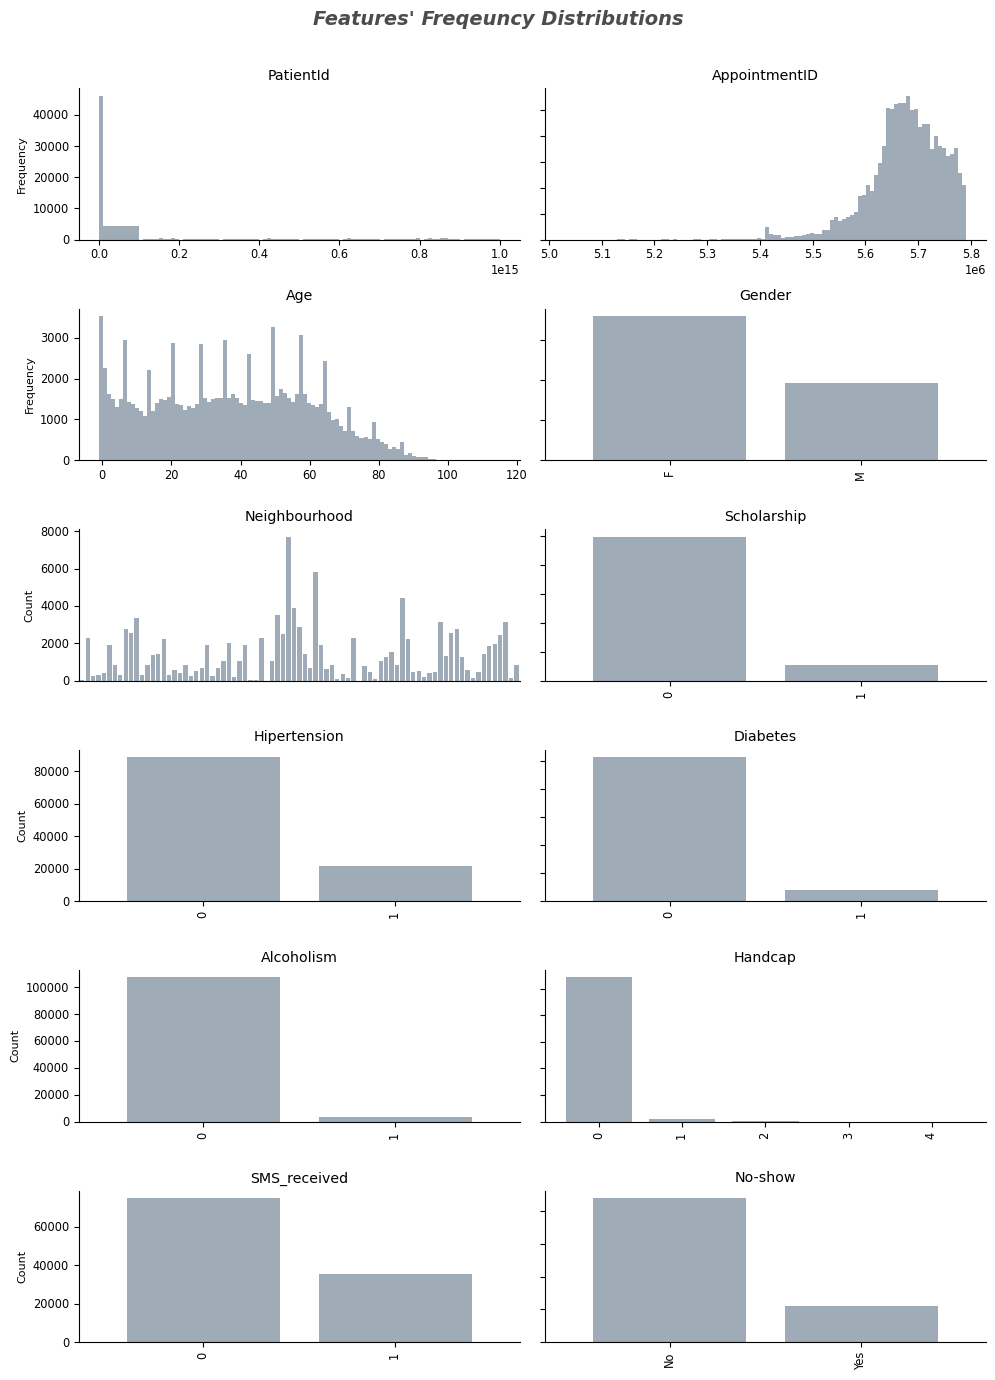

In [12]:
%time

# Create an univariate plot founction
def featuresPlotting(cont_cols, cat_cols):
    """This function outputs individual plot for a
    given set of features"""
    # Define a figure for plotting
    plt.figure(figsize=[10, 14])

    # Define a count plot
    countplot = 1

    # Define the number of columns
    total_vars = len(cont_cols) + len(cat_cols)

    # Define the number of rows
    num_rows = int(np.ceil(total_vars / 2))

    # Define the minimuim value of columns
    num_cols = min(total_vars, 2)

    # Iterate through continous columns
    for column in cont_cols:
        # Define subplots
        plt.subplot(num_rows, num_cols, countplot)

        # Plot each continuous variable
        df[column].plot(kind='hist', # plot type
                        bins=100,    # Set bins
                        title=column, # Chart name
                        color='lightslategrey', # Set color
                        alpha=.7 # adjust the transparency
                       )

        # Adjust figure axes
        plt.tight_layout()

        # Increment the plot count
        countplot+=1

    # Iterate through categorical columns
    for column in cat_cols:
        # Create suplots or categorical variables
        plt.subplot(num_rows, num_cols, countplot)

        # Plot each categorical variable
        df[column].value_counts().sort_index().plot(kind='bar', # Figure type
                                                    width=.8, # Set the bar width
                                                    title=column, # Chart names
                                                    color='lightslategrey', # Set color
                                                    alpha=.7, # adjust the transparency
                                                    sharey=True)

        if column == 'Neighbourhood':
            plt.xticks([])
        plt.xlabel(None)

        # Adjust figure axes
        plt.tight_layout()

        # Set a title for figure
        plt.suptitle("Features' Freqeuncy Distributions\n\n", fontsize=14, fontweight='bold', style='oblique', alpha=.7)

        # Set y-axis label
        plt.ylabel('Count')

        # Increment the plot count
        countplot+=1

featuresPlotting(cont_cols, cat_cols)

In the preceding plots, **PatientiD** and **AppointmentID** don't seem meaningful for our predictive modeling. Let's perform some further analysis before we can remove them.

As mentioned earlier we can see some negative values on the **Age** chart. We'll need to fix them later on. There are also a few hikes seen with infant patients holding the record.

**Handcap** feature has more than 2 class categories and after speaking with the personal we found out that these values are numbers of handicaps a patient might have. We will also need to process that as well.

The target variable seems to have about 80% of patients showed up at their appointments and only 20% otherwise which clearly indicates that we're dealing with an **imbalance class classification**.

##### d. Compute PatientiD And AppointmentID Duplicates And Value Counts.

In [13]:
# Loop through continuous columns
for column in cont_cols:
    # Print their duplicates and shapes
    print(f'{column}:\n{"Distinct Values":20} {len(df[column].value_counts())}\
    \n{"Shape":20} {df[column].shape[0]}\n{"Duplicates":20} {df[column].duplicated().sum()}\n')

PatientId:
Distinct Values      62299    
Shape                110527
Duplicates           48228

AppointmentID:
Distinct Values      110527    
Shape                110527
Duplicates           0

Age:
Distinct Values      104    
Shape                110527
Duplicates           110423



* **AppointmentID** has a mixed decimal and integer format, which can be fixed during the processing stage. However, it doesn't appear to be a useful feature, except for it lacks any duplicates that could be used as index.
* However, **PatientiD** contains about 49,000 duplicate entries, indicating that on average, every patient has about two appointments.

Since these columns don't seem to contribute significantly to our predictive modeling, it's reasonable to remove them from the datasets.


##### e. Remove AppointmentID and PatientId Variables

In [14]:
# Remove AppointmentID, PatientId
df.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)

# Store the remaining features in new variables
cont_vars, cat_vars, date_vars = partitionningThefeatures(df)

# Let's display the news variables
print(cont_vars)
print(cat_vars)
print(date_cols)

['Age']
['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
['ScheduledDay', 'AppointmentDay']


### 3.2 Multivariate plots :

Multivariate plots (comparative analysis of multiple variables, if we compare the correlation of two variables, it is called bivariate analysis)

In [15]:
# Store the output in a variable for further analysis
target = cat_vars.pop(cat_vars.index('No-show'))
target

'No-show'

#### a. Define a function for bivariate plots

CPU times: user 866 ms, sys: 113 ms, total: 979 ms
Wall time: 707 ms


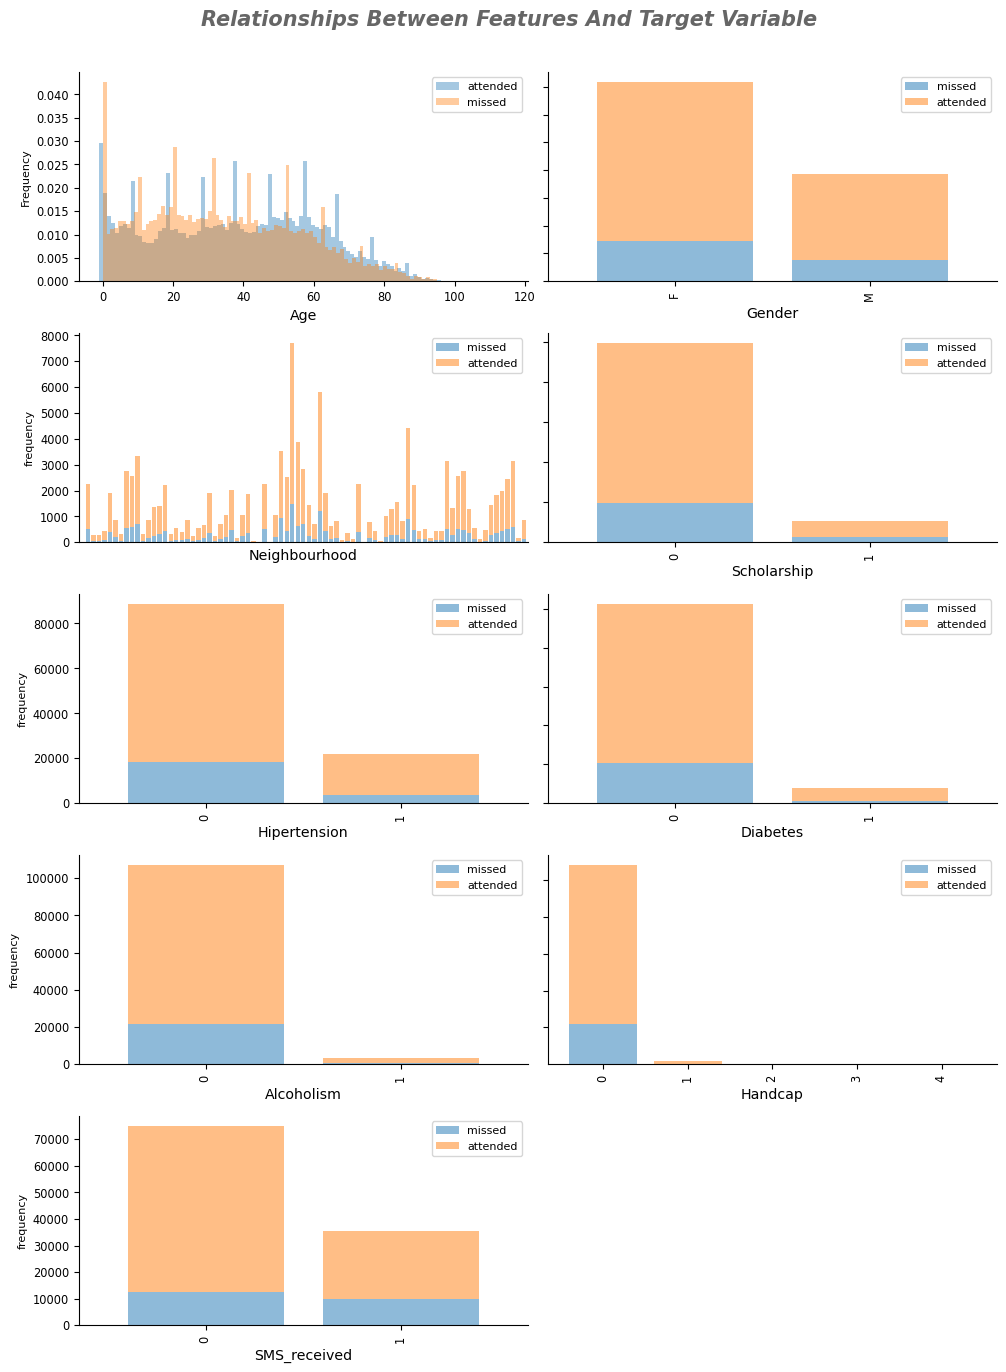

In [16]:
%%time

# Define a Bivariate plotting function

def feature_vs_target_plot(cont_vars, cat_vars, target):
    """
    This function generates the interaction between each
     feature and the target variable.

    """
    # Define total number of columns
    tota_cols = len(cont_vars) + len(cat_vars)

    # Define the number of rows
    num_rows = int(np.ceil(tota_cols / 2))

    # Mininuim value of columns
    num_cols = min(tota_cols, 2)

    # Define a figure for the plots
    plt.figure(figsize=[10, 14])


    # Initialize the plot count
    plot_count = 1

    # Iterate through continuous variables
    for column in cont_vars:
        # Set a grid for the number of plots
        plt.subplot(num_rows, num_cols, plot_count)

        # Iterate through the target variable's classes
        for status in df[target].unique():
            # Filter the datasets based on the target variable value
            df.loc[df[target] == status, column].plot(kind='hist', bins=len(df[column].unique()),
                                                     label=status, density=True, alpha=.4)

            # Set the x-axis label as the column name
            plt.xlabel(column, fontsize=10.2)

            # Add a legend
            plt.legend()

            # Set the super title for the figure
            plt.suptitle('Relationships Between Features And Target Variable\n\n',
                         fontweight='bold', fontsize=15, alpha=.6, style='oblique')

            # define better names for the target classes for a better plot
            plt.legend(['attended', 'missed'])

            # Increment the plot count
            plot_count += 1

            # Adjust the layout
            plt.tight_layout()

    # Iterate through categorical variables
    for column in cat_vars:
        # Create a subplot
        ax = plt.subplot(num_rows, num_cols, plot_count-1)

        # Compute the cross-tabulation between the column and target variable
        crosstabb = pd.crosstab(df[column], df[target])
        # Switxh up cross-tabulation columns
        crosstabb = crosstabb.iloc[:, ::-1]

        # Plot the cross-tabulation as a stacked bar chart
        crosstabb.plot(kind='bar', width=.8, alpha=.5, stacked=True,
                       sharey=True, ax=ax)
        if column == 'Neighbourhood':
            plt.xticks([])

        # define better for the target classes for a better plot
        plt.legend(['missed', 'attended'])

        # Set the x-axis label as the column name
        ax.set_xlabel(column, fontsize=10.2)

        # Set y-axis label
        plt.ylabel('frequency')

        # Adjust the subplot position
        plt.subplots_adjust(bottom=.04)

        # Increment the plot count
        plot_count += 1

# Call the function with the appropriate parameters
feature_vs_target_plot(cont_vars, cat_vars, target)

Across all the categorical features, it appears that there is minimal to no discernible impact on patients' decisions regarding whether they showed up at their appointments. However, it is worth noting that the 'SMS_receive' feature has a marginal impact, despite the fact that only 32% of patients in the dataset had received text messages.

Both the **'Age'** and **'Gender'** variables do not seem to have a direct effect on the target variable, as previously discussed. Nevertheless, given their significance to our client, we will generate multivariate plots that combine these features with the target variable to investigate whether a third feature could potentially act as an interaction.

#### b. Age against Status On Gender :

Let's create a multivariable plot between Age, Gender and the target variable

CPU times: user 580 ms, sys: 136 ms, total: 716 ms
Wall time: 310 ms


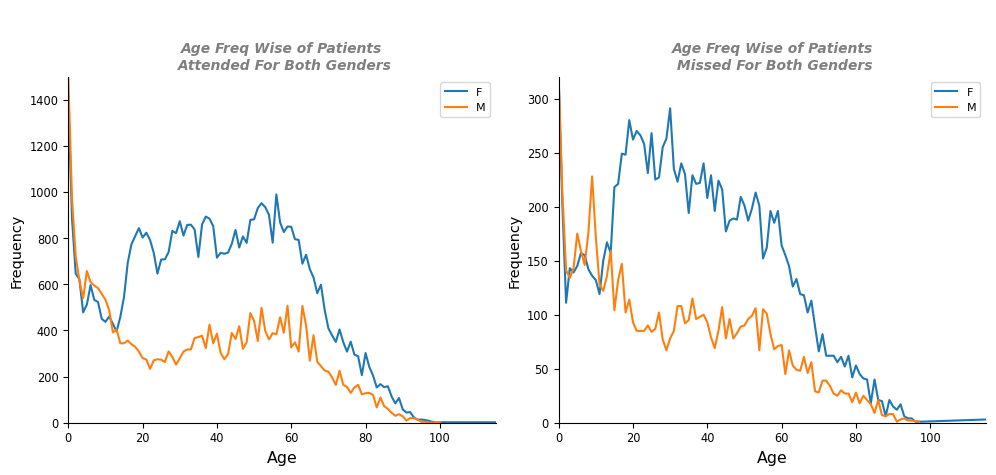

In [17]:
%%time

# Define a figure for the plot
plt.figure(figsize=[10, 4.8])


# Initialize plot count
plot_count = 1

# Iterate through target classes
for status in df[target].unique():
    # Create subplots for each target class
    plt.subplot(1, 2, plot_count)

    # Filter DataFrame based on target class
    df_sta = df.loc[df[target] == status]

    # Iterate through Gender classes within each target class
    for gender in df_sta['Gender'].unique():
        # Filter DataFrame based on Gender class
        gend_data = df_sta.loc[df_sta['Gender'] == gender, 'Age'].value_counts().sort_index()

        # Plot the values of the Age distribution
        gend_data.plot(label=gender, grid=False)

        # Set plot title and axis labels
        plt.xlabel('Age', fontsize=11.4)
        plt.ylabel('Frequency', fontsize=10.4)

        # Set the axis limits based on the maximum Age value and the maximum frequency in the current Gender class
        plt.axis([0, df_sta.Age.max(), 0, gend_data.max()])

        # Adjust axes positionss
        plt.tight_layout()

        if status == 'No':

            plt.title(f'\n\nAge Freq Wise of Patients\n {"Attended"} For Both Genders', fontsize=10,
                      fontweight='bold', alpha=.5, style='oblique')

        else:

            plt.title(f'\n\nAge Freq Wise of Patients\n {"Missed"} For Both Genders', fontsize=10,
                      fontweight='bold', alpha=.5, style='oblique')


        # Add legend to differentiate Gender classes
        plt.legend()

    # Increment plot count
    plot_count += 1


On female chart children and women in their 40s and 50s are more likely to show up for their appointments. This pattern makes sense, as parents tend to prioritize their children's health, and older patients are more susceptible to diseases.


In contrast, while the pattern appears to be similar in both charts for male patients it's worth noting that enfants through adolescent patients are more likely to show up for their appointments.

These observations suggest that the factors influencing appointment attendance may vary between genders and age groups. Thus we'll include both **'Age'** and **'Gender'** in our predictive modeling.

### 3.3 Analyzing Datetime Series Variables:

#### a Feature Engineering :

As a general practice, we typically avoid performing feature engineering during the initial feature exploration. However, in this particular case, we will need to extract some components from the datetime features as new columns to facilitate further analysis.

* Define a new variable called '**WaitingTime**', which represents the time difference between the '**ScheduledDay**' and '**AppointmentDay**', to investigate its potential impact on the target variable.

* Define new variables for the '**month**', '**week**', and '**day**' components from both datetime series. We will need to adjust some of their values to ensure they make sense, especially if '**ScheduledDay**' is a date ahead of  '**AppointmentDay**'.

It's worth noting that, since the '**AppointmentDay**' hours, minutes, and seconds components aare zeros, we decided not to include these components present in '**ScheduledDay**' variable. Similarly, the '**Year**' component can be omitted, as the dataset only contains samples from the year 2016, making it challenging to compare it with another year for example.

#### b. Define a fuction that generates datetime series components

In [18]:
# Create a function that generates new components
def datetime_components(df, date_vars):
    """
    This function generates new features based on datetime variables.
    Args:
        df (DataFrame): The input DataFrame.
        date_vars (list): List of datetime variables to process.

    Returns:
        DataFrame: The modified DataFrame with new features.
    """
    # Define WaitingTime feature as the difference in days between the two dateime Series
    df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

    # Loop through indices as rows
    for index, row in df.iterrows():
        # Check for 'Waitime' instances values less than zero
        if row['WaitingTime'] < 0:
            # Switch vales between two datetimes series
            df.at[index, 'ScheduledDay'], df.at[index, 'AppointmentDay'] = \
            df.at[index, 'AppointmentDay'], df.at[index, 'ScheduledDay']

    # Loop through datetime features
    for column in date_vars:
        # Loop through indices and datetime components
        for i, components in enumerate(['Mon', 'Week', 'Day']):
            # Define month, weekday, and day variables for both datetime Series
            df[f'{column}_{components}'] = [df[column].dt.month, \
                                                df[column].dt.weekday, df[column].dt.day][i]

    # Convert 'WaitingTime' into positive values
    df.WaitingTime = np.abs(df.WaitingTime)

    # Drop the original datetimes series
    df.drop(date_vars, axis=1, inplace=True)

    # Return the modified DataFrame
    return df

# Define new df with new input variables
df = datetime_components(df, date_vars)
df[:3]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,ScheduledDay_Mon,ScheduledDay_Week,ScheduledDay_Day,AppointmentDay_Mon,AppointmentDay_Week,AppointmentDay_Day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,4,4,29,4,4,29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,4,4,29,4,4,29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,4,4,29,4,4,29


#### c. Univariate plot of New Features :

Let's plot the new features individually to learn about their distribution.

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 8.11 µs


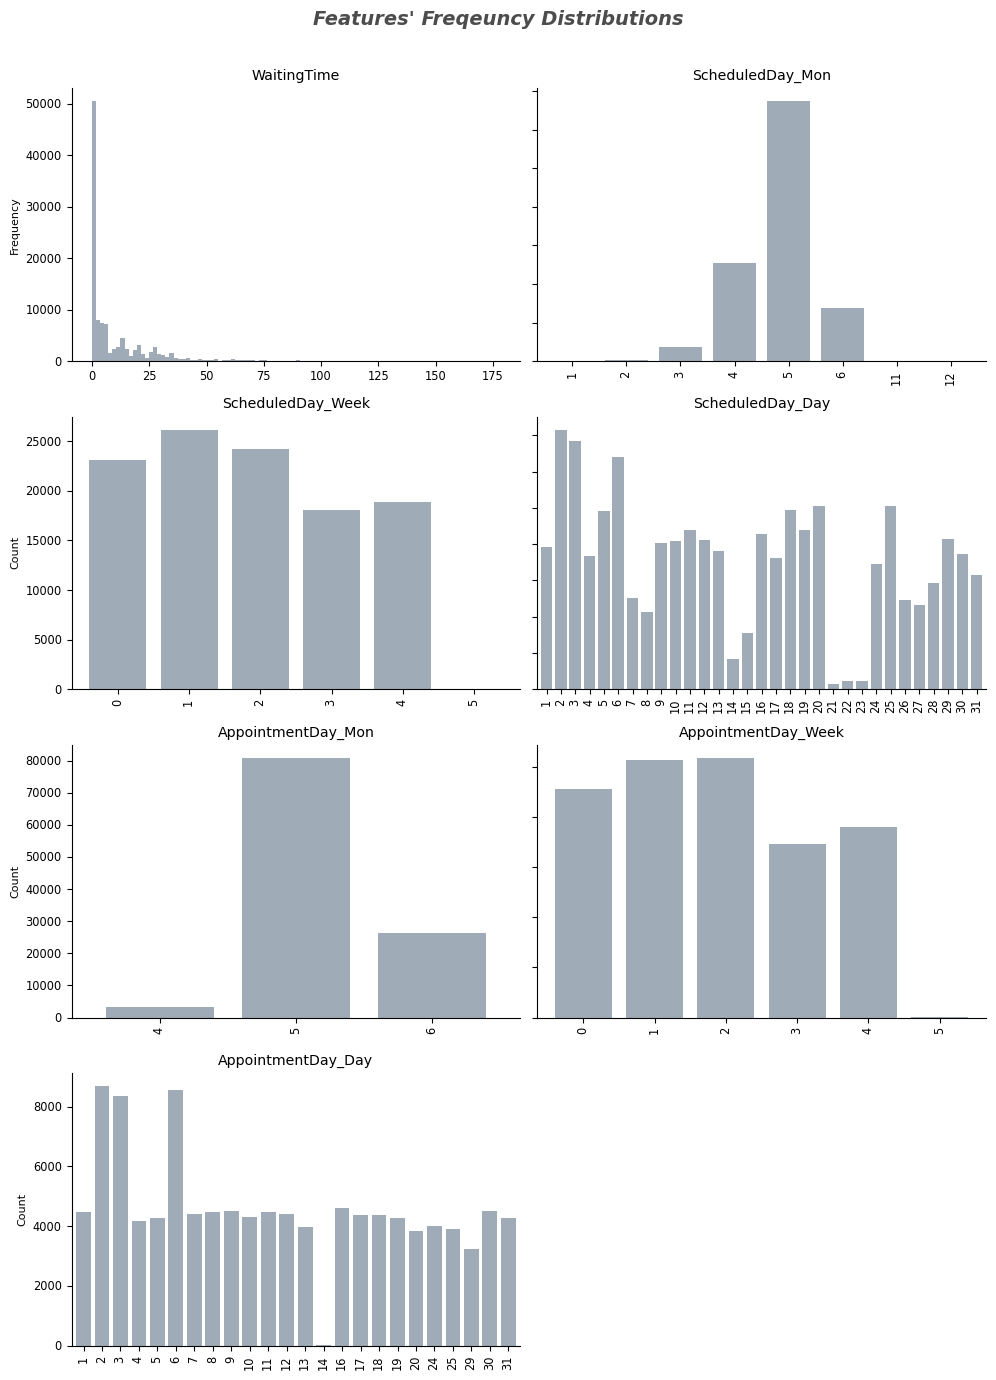

In [19]:
%time

# Define lists for new variables only
new_contVars = [df.columns.tolist().pop(df.columns.tolist().index('WaitingTime'))]
new_catVars = df.columns.tolist()[df.columns.tolist().index('ScheduledDay_Mon'):]

# Having created Univariate function early on we can just apply that on the lists of
# new the variables to plot their frequency distributions.
featuresPlotting(new_contVars, new_catVars)

* **Waitingtime** peek of the distribution is at 0 which suggests a large number of patients had same-day appointments or in very short period of waiting times. As you move to the right on the distribution, the number of patients decreases, indicating longer waiting times with right tail containing a few patients who had to wait over 100 days for their appointments


* **Month** plots in both datetime series don't seem to containing all the 12 months of the year. Clearly this datasets is fairly unsufficient by machine learning standards, but perfect to get started.
While month of May has the highest registered patients for appoimntment, the distribution of patients on scheduled day throughout the months seems normal on the other hand.

* **Week** plots containing six bars indicating the clinic closing on Sundays.

#### 3.3c Bivariate Plots of New features againts target :

Let's plot to each new feature against the target to learn about their relationship.

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


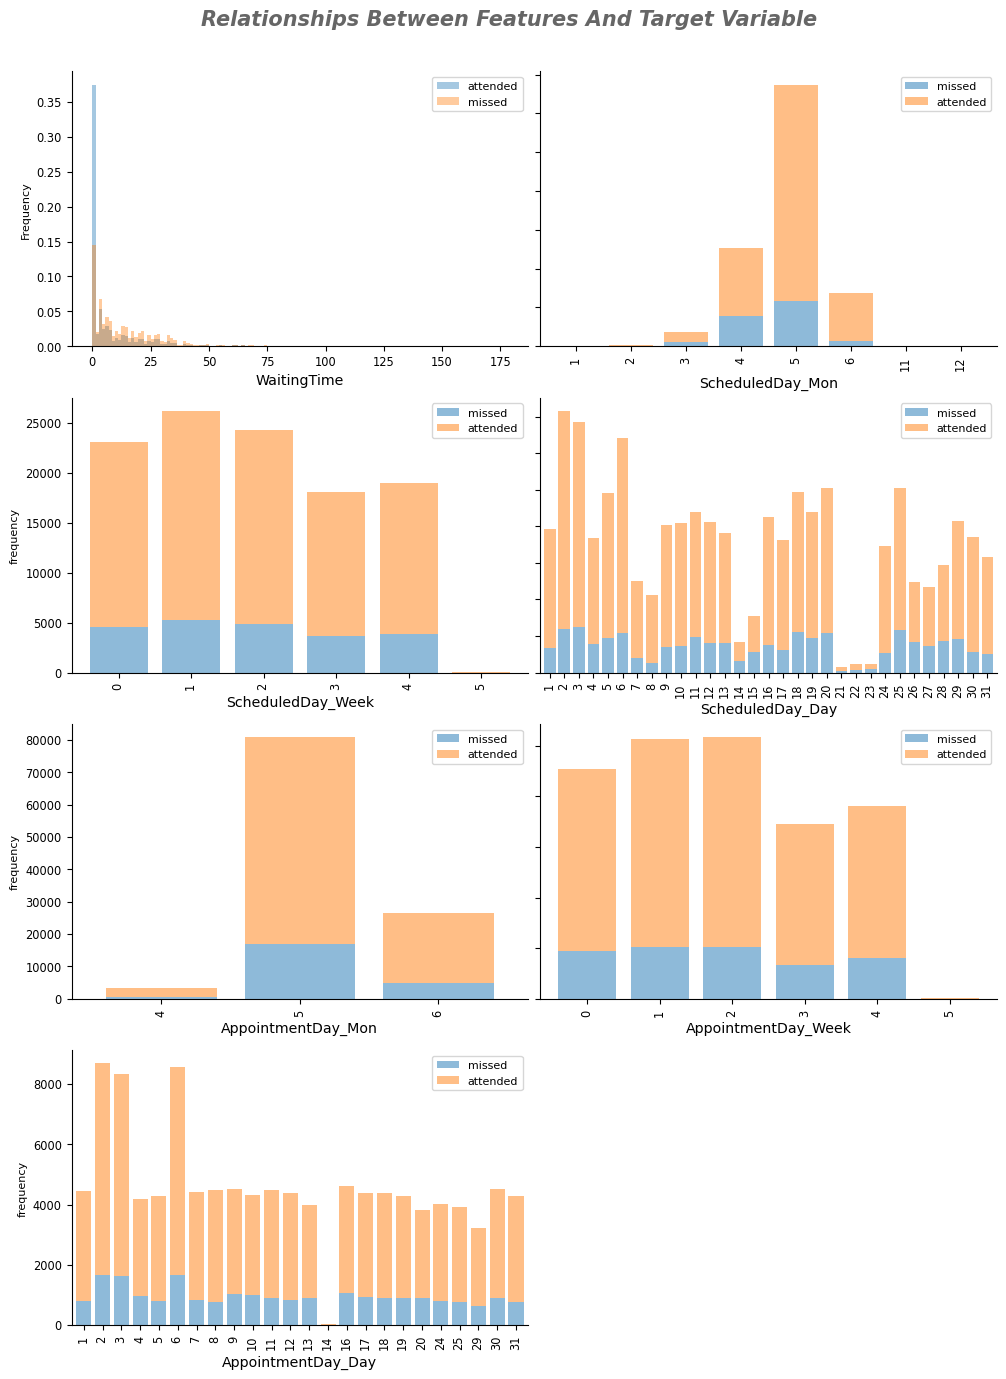

In [20]:
%time

# Again we can achieve this plot by using the bivariate function we created earlier.
feature_vs_target_plot(new_contVars, new_catVars, target)

New features appear to exhibit variations across different values of the target variable. Therefore, we will incorporate them into our predictive modeling.

So far, we provided insights into the dataset's structure, distributions of features, and their relationships with the target variable, and some feature engineering date time series features in order to continuing exploring the data, laying the groundwork for further analysis...


**Next in our modeling project, with informations gain unpon exploring the data, we'll perform some preprocessing including some feature engineering as well for our predictive modeling.**

In [21]:
# Encode target variable
df['No-show'] = np.where(df['No-show'] == 'No', 1, 0)

# Binarize Gender variable
df['Gender'] = np.where(df.Gender == 'F', 0, 1)

# Encode Neighbourhood feature
# Set number of feature for hashing
n_features = 40
# Define a dictionary key value pair where value is the neighbourhood
neigh_dict = [{'Neighbourhood':val} for val in df['Neighbourhood']]

# Intaantiate the FeatureHasher class
hasher = feature_extraction.FeatureHasher(n_features=n_features, input_type='dict')
# Fit and Transform the Neighbourhood Feature and convert into array
hasher_array = hasher.fit_transform(neigh_dict).toarray()
# Define column names for matrix
col_names = ['neigh_' + str(i) for i in range(n_features)]
# Define a dataframe using the hashing array created
sparse_df = pd.DataFrame(hasher_array, columns=col_names).astype(int)

# Concatenate the sparse data with original and delete Neighbourhood
# feature from datasets
df = pd.concat([df.drop('Neighbourhood', axis=1), sparse_df], axis=1)

# Display the first five rows
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,ScheduledDay_Mon,ScheduledDay_Week,ScheduledDay_Day,AppointmentDay_Mon,AppointmentDay_Week,AppointmentDay_Day,neigh_0,neigh_1,neigh_2,neigh_3,neigh_4,neigh_5,neigh_6,neigh_7,neigh_8,neigh_9,neigh_10,neigh_11,neigh_12,neigh_13,neigh_14,neigh_15,neigh_16,neigh_17,neigh_18,neigh_19,neigh_20,neigh_21,neigh_22,neigh_23,neigh_24,neigh_25,neigh_26,neigh_27,neigh_28,neigh_29,neigh_30,neigh_31,neigh_32,neigh_33,neigh_34,neigh_35,neigh_36,neigh_37,neigh_38,neigh_39
0,0,62,0,1,0,0,0,0,1,1,4,4,29,4,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,56,0,0,0,0,0,0,1,1,4,4,29,4,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,1,1,4,4,29,4,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,1,1,4,4,29,4,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,1,1,4,4,29,4,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
